<a href="https://colab.research.google.com/github/felixlundstrom/workshop-2025/blob/main/k_nearest_neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbors (KNN) Algorithm Tutorial - Machine Learning Basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
# Import the iris dataset as provided by the sklearn Python module
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
# Converting sklearn data into Pandas dataframe
# target variables imply
# 0.0 - Setosa
# 1.0 - Versicolor
# 2.0 - Virginica
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Checking for outliers and imbalanced data

<Axes: xlabel='target', ylabel='count'>

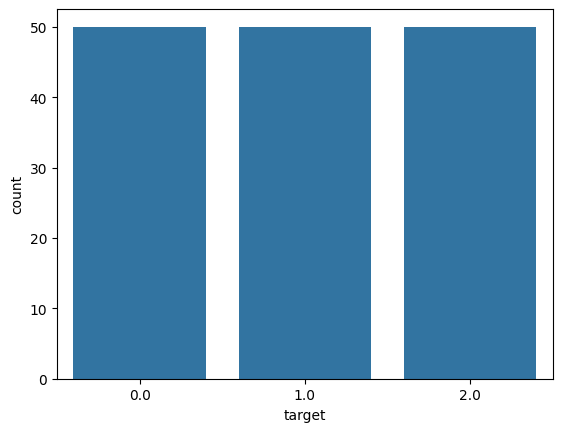

In [5]:
# data is perfectly balanced
sns.countplot(x='target', data=iris)

## Plotting a 2-D graph

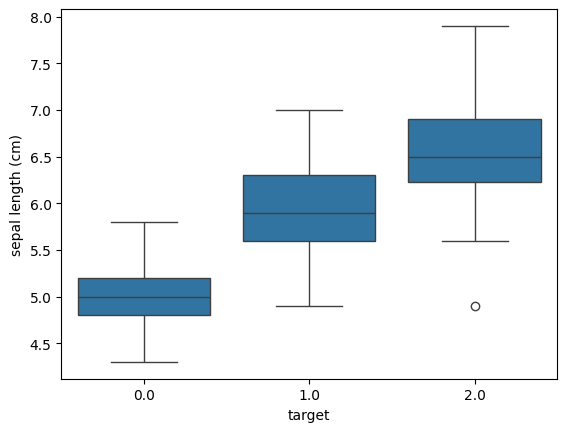

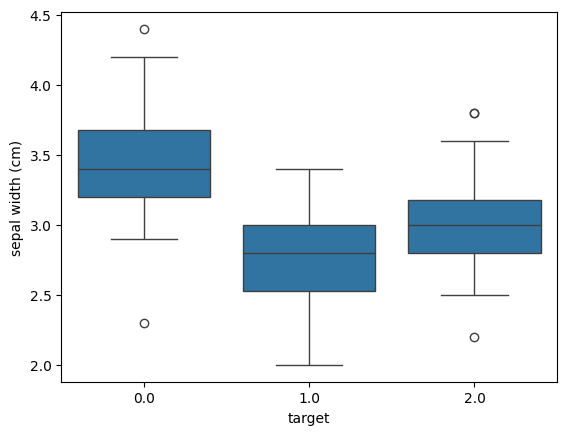

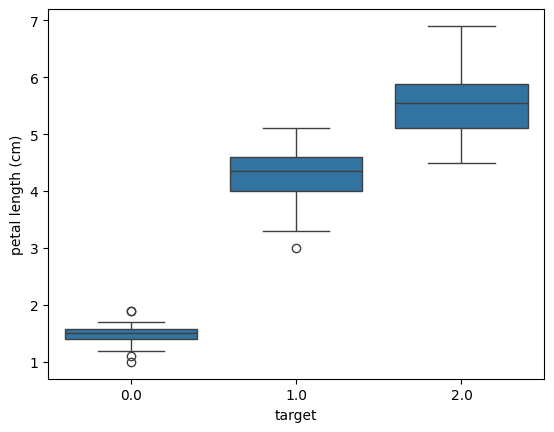

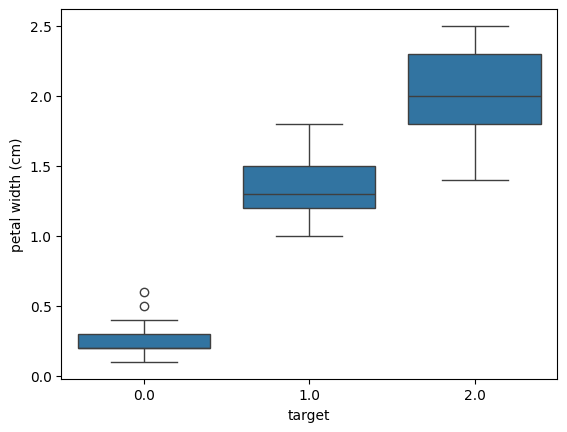

In [6]:
# not much of outliers to be handled
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
  sns.boxplot(x='target', y=feature, data=iris)
  plt.show()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

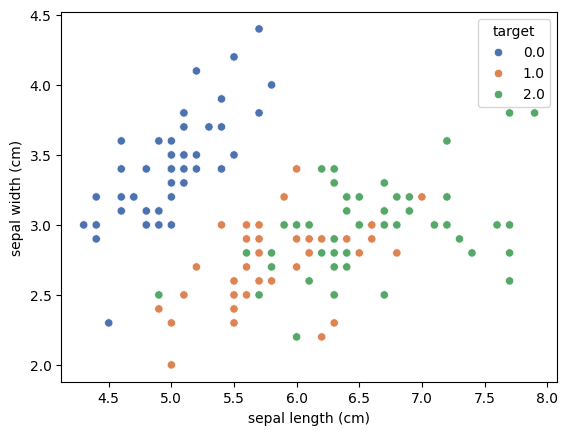

In [7]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='target', palette="deep")

## Separating features and target

In [8]:
# X variable contains flower features
# Y variable contains target values
X = iris.drop(['target'], axis=1)
y = iris['target']

## Split the dataset into train and test sets

In [9]:
# 60% of the data will be randomly selected at training data
# remaining 40% as testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Initial model

In [10]:
# Initial model with nearest neighbor as 1(k-value)
# further, k will be replaced with optimal value
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9166666666666666


## Finding the right k-value

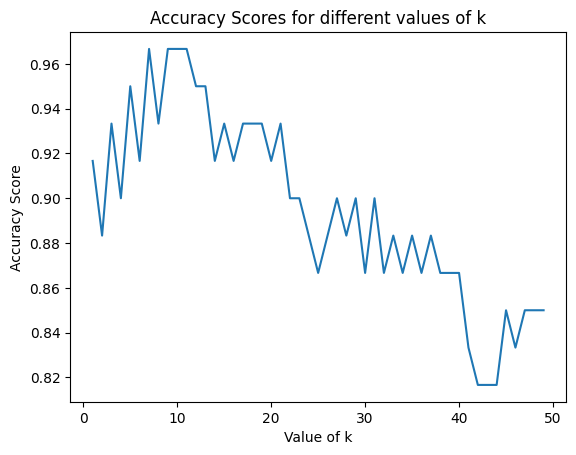

In [11]:
# checking accuracy score for k-value rangin from 1 to ? (fill the "?"")
k_range = list(range(1,?))
scores = []

# model fitting and calculating accuracy score
# for each k-value in the range 1-?
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

## Accuracy for optimal k-value

In [12]:
# Fill the optimal k-value
knn = KNeighborsClassifier(n_neighbors=?)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9666666666666667


## Predicting class of new data

In [13]:
knn = KNeighborsClassifier(n_neighbors=?)

# fitting/"training" the entire data without splitting
# into train and test
knn.fit(iris.drop(['target'], axis=1), iris['target'])

# Show test results
prediction = knn.predict(X_test)

flower_map = {0: 'Setosa',  1: 'Versicolor', 2: 'Virginica'}

for p, y in zip(prediction, y_test) :
    if(p == y):
        print(f'TRUE: Predicted: {flower_map[p]}, Target: {flower_map[y]}')
    else:
        print(f'FALSE: Predicted: {flower_map[p]}, Target: {flower_map[y]}')

TRUE: Predicted: Virginica, Target: Virginica
TRUE: Predicted: Versicolor, Target: Versicolor
TRUE: Predicted: Setosa, Target: Setosa
TRUE: Predicted: Virginica, Target: Virginica
TRUE: Predicted: Setosa, Target: Setosa
TRUE: Predicted: Virginica, Target: Virginica
TRUE: Predicted: Setosa, Target: Setosa
TRUE: Predicted: Versicolor, Target: Versicolor
TRUE: Predicted: Versicolor, Target: Versicolor
TRUE: Predicted: Versicolor, Target: Versicolor
TRUE: Predicted: Virginica, Target: Virginica
TRUE: Predicted: Versicolor, Target: Versicolor
TRUE: Predicted: Versicolor, Target: Versicolor
TRUE: Predicted: Versicolor, Target: Versicolor
TRUE: Predicted: Versicolor, Target: Versicolor
TRUE: Predicted: Setosa, Target: Setosa
TRUE: Predicted: Versicolor, Target: Versicolor
TRUE: Predicted: Versicolor, Target: Versicolor
TRUE: Predicted: Setosa, Target: Setosa
TRUE: Predicted: Setosa, Target: Setosa
TRUE: Predicted: Virginica, Target: Virginica
TRUE: Predicted: Versicolor, Target: Versicolor
TR